In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from scipy import stats
import numpy as np

# Contents



- [Loading & Cleaning](#scrollTo=st4sZDxmQnQd)

- Visualizations:
  - Tables:
    - [Table 1](#scrollTo=qoc1EuHEQbv5)
    - [Table 2](#scrollTo=7iox-r5BPXwj)
  - Figures:
    - [Figure 1](#scrollTo=AJvr1-PSTPnM)

- Modeling:
  - [Table 3](#scrollTo=xXAnDSDjNzmK)
  - [Table 4](#scrollTo=nMZaD8b4QvMY)
  - [Table 5](#scrollTo=niyij6qHRptG)
  - [Table A1](#scrollTo=fW84i-4pSp5v)

# Loading Data

## Loading in 'witch_data'

Raw dataset which is used to produce Table 2 (STATA dataset)

In [4]:
witchPath = 'witch_data.dta'
witchDF = pd.read_stata(witchPath)
witchDF.head()

,vid,year,recent_victim,gender_rv,age_rv,tribe_rv,month_rv,year_rv,season_rv,alone_rv,relativ_rv,livestock_rv,land_rv,wealth_rv
0,1011,2002,1992.0,1,70,1,8.0,92.0,NaN,1,1,2,1,1.0
1,1012,2002,1996.0,1,30,1,6.0,96.0,NaN,2,1,1,1,1.0
2,1013,2002,NaN,1,40,1,7.0,NaN,NaN,2,1,1,2,1.0
3,1014,2002,1998.0,1,40,1,9.0,98.0,3.0,2,1,1,1,2.0
4,1023,2002,1983.0,1,60,1,3.0,83.0,NaN,2,1,1,2,1.0


## Loading in 'events_data'

Raw dataset which is used to produce Table 1, 3, 4, 5, A1 and Figure 1 (STATA dataset)

In [5]:
eventsPath = 'events_data.dta'
eventsDF = pd.read_stata(eventsPath)
eventsDF.head()

,vid,year,witch_murders,famine,drought,flood,any_livestock,cholera,measles,diarrhea,...,Iyear23,Iyear24,Iyear25,Iyear26,Iyear27,Iyear28,Iyear29,Iyear30,aidfr,aidngo
0,3192,1992,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,3153,1992,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1041,1992,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,1063,1992,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,2092,1992,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


# Table 1: Descriptive Statistics

get descriptive statistics, keeping mean, std. dev., and count (observed) columns, and take transpose of it

In [6]:
eventsDesc = eventsDF.describe().T
eventsDesc.head()

,count,mean,std,min,25%,50%,75%,max
vid,736.0,2022.164402,848.073780,1012.0,1052.0,2091.0,3141.0,3193.0
year,736.0,1996.993207,3.161195,1992.0,1994.0,1997.0,2000.0,2002.0
witch_murders,736.0,0.091033,0.323461,0.0,0.0,0.0,0.0,3.0
famine,736.0,0.173913,0.379292,0.0,0.0,0.0,0.0,1.0
drought,736.0,0.118207,0.323072,0.0,0.0,0.0,0.0,1.0


## Part A: Crimes per village-year

In [7]:
t1A_rows = ['witch_murders', 'witch_murders_kaya', 'witch_tot',
        'witch_tot_kaya', 'oth_murders', 'oth_murders_kaya',
        'tot_murders', 'tot_murders_kaya']
t1A_cols = ['count', 'mean', 'std', 'min', 'max']
t1_A = eventsDesc.loc[t1A_rows, t1A_cols]
rows_to_scale = [row for row in t1_A.index if 'kaya' in row]
t1_A.loc[rows_to_scale] *= 1000 # multiplying statistics for per 1000 households by 1000 to get numbers that match the paper
t1_A

# witch_murders_kaya = Number of witch murders per 1000 households
# witch_tot = Total number of witch murders and attacks
# our numbers match the adjusted statistics from tz_witch-FINAL.do, but not witch killing_do.do
# tz_witch-FINAL is not in the file?

,count,mean,std,min,max
witch_murders,736.0,0.091033,0.323461,0.0,3.000000
witch_murders_kaya,736000.0,0.267391,1.061288,0.0,11.111111
witch_tot,736.0,0.190217,0.570678,0.0,5.000000
witch_tot_kaya,736000.0,0.558257,1.864413,0.0,18.072288
oth_murders,736.0,0.091033,0.395383,0.0,5.000000
oth_murders_kaya,736000.0,0.230297,1.131867,0.0,16.000001
tot_murders,736.0,0.182065,0.515875,0.0,5.000000
tot_murders_kaya,736000.0,0.497688,1.562400,0.0,16.000001


## Panel B: Natural calamities per village-year

In [8]:
t1B_rows = ['any_rain', 'rain_2yr', 'drought', 'flood',
            'famine', 'any_disease', 'any_livestock']
t1B_cols = ['count', 'mean', 'std', 'min', 'max']
t1_B = eventsDesc.loc[t1B_rows, t1B_cols]
t1_B

# ANY_RAIN - extreme rainfall
# RAIN_2YR - Indicator for extreme rainfall in current and previous year

,count,mean,std,min,max
any_rain,736.0,0.171196,0.376936,0.0,1.0
rain_2yr,736.0,0.069293,0.254125,0.0,1.0
drought,736.0,0.118207,0.323072,0.0,1.0
flood,736.0,0.057065,0.232125,0.0,1.0
famine,736.0,0.173913,0.379292,0.0,1.0
any_disease,736.0,0.148098,0.355438,0.0,1.0
any_livestock,736.0,0.010870,0.103760,0.0,1.0


## Panel C: Village characteristics

In [9]:
t1C_rows = ['y_vill', 'educat', 'hh_sukuma', 'cashcrop', 'kaya', 'norelig', 'wmgrp']
t1C_cols = ['count', 'mean', 'std', 'min', 'max']
t1_C = eventsDesc.loc[t1C_rows, t1C_cols]
t1_C

,count,mean,std,min,max
y_vill,736.0,193.998795,78.115845,82.278770,516.444031
educat,736.0,4.034622,1.067853,0.857143,6.666667
hh_sukuma,736.0,0.894283,0.173107,0.000000,1.000000
cashcrop,736.0,0.606884,0.242545,0.000000,0.950000
kaya,736.0,404.461957,179.339935,90.000000,877.000000
norelig,736.0,0.654115,0.206191,0.000000,1.000000
wmgrp,736.0,0.004052,0.004825,0.000000,0.019455


In [10]:
t1_A = t1_A.drop(columns=['min','max'])
t1_B = t1_B.drop(columns=['min','max'])
t1_C = t1_C.drop(columns=['min','max'])

In [11]:
combined_table = pd.concat([t1_A, t1_B, t1_C]).round(2)
combined_table

,count,mean,std
witch_murders,736.0,0.09,0.32
witch_murders_kaya,736000.0,0.27,1.06
witch_tot,736.0,0.19,0.57
witch_tot_kaya,736000.0,0.56,1.86
oth_murders,736.0,0.09,0.40
oth_murders_kaya,736000.0,0.23,1.13
tot_murders,736.0,0.18,0.52
tot_murders_kaya,736000.0,0.50,1.56
any_rain,736.0,0.17,0.38
rain_2yr,736.0,0.07,0.25


# Table 2: Characteristics of Victims

## Panel A: Demographic characteristics

In [12]:
# final Panel A
witchDF['gender_rv'].unique() # coding for gender does not match TZ witch codebook
witchclean = witchDF.copy()
witchclean['gender_rv'] = witchclean['gender_rv'].replace([1, 2], [1, 0]) # recoding to match
witchclean['relativ_rv'] = witchclean['relativ_rv'].replace([1, 2], [1, 0])
witchclean['alone_rv'] = witchclean['alone_rv'].replace([1,2], [0, 1]) # coding is inconsistent
witchclean['tribe_rv'] = witchclean['tribe_rv'].replace([1, 2], [1, 0])
witchDesc = witchclean.describe().T
panel_A_rows = ['gender_rv', 'age_rv', 'relativ_rv', 'alone_rv', 'tribe_rv']
panel_A_col = ['mean']
t2_A = round(witchDesc.loc[panel_A_rows, panel_A_col], 2)
t2_A

,mean
gender_rv,0.96
age_rv,57.60
relativ_rv,0.98
alone_rv,0.87
tribe_rv,0.96


In [13]:
def getInfo(df: pd.DataFrame, column: str) -> pd.DataFrame:
  """ Creates tables like in Table 2 """
  freq = df[column].value_counts()
  percent = df[column].value_counts(normalize=True) * 100
  cum = percent.cumsum()
  data = {'Freq': freq,
        'Percent': percent,
        'Cum.': cum}
  new_df = pd.DataFrame(data).sort_index()

  sum1 = new_df.iloc[:, 0].sum()
  sum2 = new_df.iloc[:, 1].sum()

  new_df.loc['Total'] = [sum1, sum2, np.NaN]
  return new_df

In [14]:
#TODO: this section matches the code in the .do file, however the paper authors publish the 'mean' in their descriptive statistics
panelA_cols = ['gender_rv', 'age_rv', 'relativ_rv', 'alone_rv', 'tribe_rv']
for col in panelA_cols:
  display(getInfo(witchDF, col).tail())

,Freq,Percent,Cum.
gender_rv,,,
1,51.0,96.226415,96.226415
2,2.0,3.773585,100.000000
Total,53.0,100.000000,NaN


,Freq,Percent,Cum.
age_rv,,,
70,8.0,15.094340,37.735849
75,2.0,3.773585,81.132075
76,1.0,1.886792,92.452830
80,2.0,3.773585,84.905660
Total,53.0,100.000000,NaN


,Freq,Percent,Cum.
relativ_rv,,,
1,52.0,98.113208,98.113208
2,1.0,1.886792,100.000000
Total,53.0,100.000000,NaN


,Freq,Percent,Cum.
alone_rv,,,
1,7.0,13.207547,100.000000
2,46.0,86.792453,86.792453
Total,53.0,100.000000,NaN


,Freq,Percent,Cum.
tribe_rv,,,
1,51.0,96.226415,96.226415
2,2.0,3.773585,100.000000
Total,53.0,100.000000,NaN


In [15]:
# uses stata summ with details

#TODO: get rest of descriptive statistics for cols 'age_rv' from witchDF

witchPercentiles = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
ageStats = witchDF[['age_rv']].describe(percentiles=witchPercentiles)
moreStats = stats.describe(witchDF['age_rv'])
ageStats.loc['variance'] = moreStats.variance
ageStats.loc['skewness'] = moreStats.skewness
ageStats.loc['kurtosis'] = moreStats.kurtosis #NOTE: this does not match expected value
ageStats

,age_rv
count,53.000000
mean,57.603774
std,12.851728
min,30.000000
1%,30.000000
5%,36.800000
10%,40.000000
25%,50.000000
50%,60.000000
75%,68.000000


## Panel B: Socio-economic characteristics

In [16]:
# wealth

# Filter DataFrame to remove rows with missing values in 'wealth_rv' column
wealthDF = witchDF[witchDF['wealth_rv'].notna()]

# Calculate proportions for each value of 'wealth_rv'
panel_wealth = (wealthDF.groupby('wealth_rv').size() / len(wealthDF)).reset_index()
panel_wealth.columns = ['wealth_rv', 'mean']

# Append additional rows for specific categories
row_to_append_wealth = pd.DataFrame([
    ['Below Average', panel_wealth[panel_wealth['wealth_rv'] == 1]['mean'].sum()],
    ['Not Wealthy', panel_wealth[panel_wealth['wealth_rv'] == 2]['mean'].sum()]
], columns=['wealth_rv', 'mean'])

# Concatenate DataFrame with additional rows
panel_wealth = pd.concat([panel_wealth, row_to_append_wealth])

# Round values to two decimal places
panel_wealth = panel_wealth.round(2)

# Set 'wealth_rv' as index
panel_wealth = panel_wealth.set_index('wealth_rv')

# Display the resulting DataFrame
print(panel_wealth)

               mean
wealth_rv          
1.0            0.69
2.0            0.31
Below Average  0.69
Not Wealthy    0.31


In [17]:
# Filter DataFrame to remove rows with missing values in 'livestock_rv' column
livestockDF = witchDF[witchDF['livestock_rv'].notna()]

# Calculate proportions for each value of 'livestock_rv'
panel_livestock = (livestockDF.groupby('livestock_rv').size() / len(livestockDF)).reset_index()
panel_livestock.columns = ['livestock_rv', 'mean']

# Append additional rows for specific categories
row_to_append_livestock = pd.DataFrame([
    ['Below Average', panel_livestock[panel_livestock['livestock_rv'] == 1]['mean'].sum()],
    ['Average', panel_livestock[panel_livestock['livestock_rv'] == 2]['mean'].sum()],
    ['Above Average', panel_livestock[panel_livestock['livestock_rv'] == 3]['mean'].sum()]
], columns=['livestock_rv', 'mean'])

# Concatenate DataFrame with additional rows
panel_livestock = pd.concat([panel_livestock, row_to_append_livestock])

# Round values to two decimal places
panel_livestock = panel_livestock.round(2)

# Set 'livestock_rv' as index
panel_livestock = panel_livestock.set_index('livestock_rv')

# Display the resulting DataFrame
print(panel_livestock)

               mean
livestock_rv       
1              0.55
2              0.38
3              0.08
Below Average  0.55
Average        0.38
Above Average  0.08


In [18]:
# land

# Filter DataFrame to remove rows with missing values in 'land_rv' column
landDF = witchDF[witchDF['land_rv'].notna()]

# Calculate proportions for each value of 'land_rv'
panel_land = (landDF.groupby('land_rv').size() / len(landDF)).reset_index()
panel_land.columns = ['land_rv', 'mean']

# Append additional rows for specific categories
row_to_append_land = pd.DataFrame([
    ['Below Average', panel_land[panel_land['land_rv'] == 1]['mean'].sum()],
    ['Average', panel_land[panel_land['land_rv'] == 2]['mean'].sum()],
    ['Above Average', panel_land[panel_land['land_rv'] == 3]['mean'].sum()]
], columns=['land_rv', 'mean'])

# Concatenate DataFrame with additional rows
panel_land = pd.concat([panel_land, row_to_append_land])

# Round values to two decimal places
panel_land = panel_land.round(2)

# Set 'land_rv' as index
panel_land = panel_land.set_index('land_rv')

# Display the resulting DataFrame
print(panel_land)


               mean
land_rv            
1              0.32
2              0.57
3              0.11
Below Average  0.32
Average        0.57
Above Average  0.11


## Panel C: Timing of witch murders

In [19]:
timingDF = witchDF[witchDF['month_rv'].notna()]
panelC = (timingDF.groupby('month_rv').count()/len(timingDF)).reset_index()[['vid', 'month_rv']].rename(columns = {"vid" : "mean"})
row_to_append = pd.DataFrame([['Pre-harvest/harvest season',
                               panelC[(panelC['month_rv'] > 1) & (panelC['month_rv'] < 8)]['mean'].sum()],
                              ['Post-harvest season',
                               panelC[(panelC['month_rv'] < 2) | (panelC['month_rv'] > 7)]['mean'].sum()]],
                             columns=['month_rv', 'mean'])
panelC = pd.concat([panelC, row_to_append])
panelC = round(panelC, 2)
panelC = panelC[['month_rv' , 'mean']].set_index('month_rv')
panelC

,mean
month_rv,
1.0,0.02
2.0,0.02
3.0,0.07
4.0,0.21
5.0,0.12
6.0,0.12
7.0,0.19
8.0,0.07
9.0,0.05


In [20]:
#TODO make table 'season_rv if month_rv~=.;
panelC_cols = ['year_rv', 'season_rv', 'month_rv', ]
for col in panelC_cols:
  display(getInfo(witchDF, col).head())

,Freq,Percent,Cum.
year_rv,,,
79.0,1.0,2.272727,84.090909
80.0,1.0,2.272727,88.636364
82.0,2.0,4.545455,68.181818
83.0,3.0,6.818182,36.363636
84.0,2.0,4.545455,63.636364


,Freq,Percent,Cum.
season_rv,,,
1.0,9.0,42.857143,95.238095
2.0,1.0,4.761905,100.000000
3.0,11.0,52.380952,52.380952
Total,21.0,100.000000,NaN


,Freq,Percent,Cum.
month_rv,,,
1.0,1.0,2.380952,97.619048
2.0,1.0,2.380952,100.000000
3.0,3.0,7.142857,78.571429
4.0,9.0,21.428571,21.428571
5.0,5.0,11.904762,64.285714


ttest, (mean-comparison tests)
[stata docs](https://www.stata.com/manuals/rttest.pdf)

In [21]:
witchHunger = witchDF.copy()
witchHunger['hunger'] = 0
witchHunger.loc[witchHunger['month_rv'].isnull(), 'hunger'] = np.NaN
witchHunger.loc[(witchHunger['month_rv'] > 1) & (witchHunger['month_rv'] < 8), 'hunger'] = 1

witchHunger.dropna(subset=['hunger'], inplace=True)

ttest = stats.ttest_1samp(witchHunger['hunger'], 0.5)

print(f'T-Statistic: {ttest.statistic}')
print(f'P-Value: {ttest.pvalue}')
print(f'degrees of freedom: {ttest.df}')

#TODO: get Obs., Std. Err., Std. Dev., 95% conf. interval,

# hypothesis testing? mean hunger = 0.5,
# mean < 0.5 - Pr(T < t)
# mean != 0.5 - Pr(|T| > |t|)
# mean > 0.5 - Pr(T > t)

T-Statistic: 3.467486180297939
P-Value: 0.0012475088849962848
degrees of freedom: 41


# Table 3: Impact of Rainfall on Income, Famine

In [22]:
#Make global variables: control variables, y vars, other vars

#NOTE: need to add geographic div fixed effects but its not working idk

global_data = {}

def update_global_data():
    global global_data
    global_data['any_rain'] = eventsDF['any_rain']
    global_data['hh_sukuma'] = eventsDF['hh_sukuma']
    global_data['cashcrop'] = eventsDF['cashcrop']
    global_data['kaya'] = eventsDF['kaya']
    global_data['drought'] = eventsDF['drought']
    global_data['flood'] = eventsDF['flood']
    global_data['famine'] = eventsDF['famine']
    global_data['any_disease'] = eventsDF['any_disease']
    global_data['educat'] = eventsDF['educat']
    global_data['norelig'] = eventsDF['norelig']
    global_data['wmgrp'] = eventsDF['wmgrp']
    global_data['idiv1'] = eventsDF['Idiv1']
    global_data['idiv2'] = eventsDF['Idiv2']
    global_data['idiv3'] = eventsDF['Idiv3']

update_global_data()

# new col ward_yr = 100 * year + wardno; (from eventsDF)
eventsDF['ward_yr'] = 100 * eventsDF['year'] + eventsDF['wardno']

In [23]:
#TODO: make info table of new col ward_yr
#   use previous function: getInfo(df with new col, new col's name)
display(getInfo(eventsDF, ['ward_yr']))

,Freq,Percent,Cum.
"(2593,)",3.0,0.407609,81.250000
"(2594,)",5.0,0.679348,38.994565
"(2595,)",3.0,0.407609,80.027174
"(2596,)",7.0,0.951087,9.510870
"(2597,)",3.0,0.407609,77.989130
...,...,...,...
"(3608,)",2.0,0.271739,88.858696
"(3609,)",5.0,0.679348,14.538043
"(3610,)",3.0,0.407609,87.364130
"(3611,)",3.0,0.407609,84.510870


In [25]:
#OLS 1
df_filtered = eventsDF[eventsDF['year'] == 2001]

### Dropping NaN/missing values
df_filtered_no_na = df_filtered[['y_vill', 'any_rain',
                                 'educat', 'cashcrop',
                                 'kaya', 'hh_sukuma',
                                 'norelig', 'wmgrp',
                                 'Idiv2', 'Idiv3']].dropna()

### Below, we extract the relevant variables from the DataFramey
x_df = df_filtered_no_na[['any_rain', 'educat', 'cashcrop',
                                 'kaya', 'hh_sukuma',
                                 'norelig', 'wmgrp', 'Idiv2', 'Idiv3']]
y_df = df_filtered_no_na['y_vill']

weights = df_filtered_no_na['kaya'].to_numpy()

#weighted_data = x_df * weights #pd.concat(x_df * weights, ignore_index=True)
### We now define the model, fit it to the data and then view a summary of the results
model = sm.OLS(y_df, sm.add_constant(x_df), weights=weights)
result = model.fit()
robust = result.get_robustcov_results(cov_type='HC0')
robust.summary()

/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_vill   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2.561
Date:                Fri, 26 Apr 2024   Prob (F-statistic):             0.0151
Time:                        23:34:23   Log-Likelihood:                -382.32
No. Observations:                  67   AIC:                             784.6
Df Residuals:                      57   BIC:                             806.7
Df Model:                           9                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        146.9538     64.325      2.285      0.026      18.145     275.763
any_rain     -37.8695     20.542     -1.843      0.070     -79.005       3.266
educat        -1.1770     10.526     -0.112      0.911     -22.256      19.902
cashcrop      36.7500     38.561      0.953      0.345     -40.466     113.966
kaya           0.0718      0.060      1.206      0.233      -0.047       0.191
hh_sukuma      1.9552     43.025      0.045      0.964     -84.201      88.112
norelig       15.1427     40.853      0.371      0.712     -66.664      96.950
wmgrp       2097.4161   2156.745      0.972      0.335   -2221.392    6416.224
Idiv2        -33.5806     21.859     -1.536      0.130     -77.353      10.191
Idiv3         -2.9554     28.627     -0.103      0.918     -60.280      54.370
==============================================================================
Omnibus:                       36.552   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.026
Skew:                           1.772   Prob(JB):                     4.66e-20
Kurtosis:                       7.397   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#OLS 2
df_filtered = eventsDF[eventsDF['year'] == 2001]

### Dropping NaN/missing values
df_filtered_no_na = df_filtered[['y_vill', 'any_rain',
                                 'educat', 'cashcrop',
                                 'kaya', 'hh_sukuma',
                                 'norelig', 'wmgrp',
                                 'Idiv2', 'Idiv3', 'any_disease']].dropna()

### Below, we extract the relevant variables from the DataFramey
x_df = df_filtered_no_na[['any_rain', 'educat', 'cashcrop',
                                 'kaya', 'hh_sukuma',
                                 'norelig', 'wmgrp', 'Idiv2', 'Idiv3', 'any_disease']]
y_df = df_filtered_no_na['y_vill']

weights = df_filtered_no_na['kaya'].to_numpy()

#weighted_data = x_df * weights #pd.concat(x_df * weights, ignore_index=True)
### We now define the model, fit it to the data and then view a summary of the results
model = sm.OLS(y_df, sm.add_constant(x_df), weights=weights)
result = model.fit()
robust = result.get_robustcov_results(cov_type='HC0')
robust.summary()

/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_vill   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2.701
Date:                Fri, 26 Apr 2024   Prob (F-statistic):            0.00893
Time:                        23:34:24   Log-Likelihood:                -382.00
No. Observations:                  67   AIC:                             786.0
Df Residuals:                      56   BIC:                             810.3
Df Model:                          10                                         
Covariance Type:                  HC0                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         133.1831     77.146      1.726      0.090     -21.358     287.725
any_rain      -36.1592     21.718     -1.665      0.102     -79.666       7.348
educat         -1.0281     10.860     -0.095      0.925     -22.783      20.727
cashcrop       35.7165     38.400      0.930      0.356     -41.208     112.641
kaya            0.0682      0.063      1.088      0.281      -0.057       0.194
hh_sukuma       5.1052     44.854      0.114      0.910     -84.749      94.959
norelig        18.8499     43.309      0.435      0.665     -67.908     105.608
wmgrp        1942.0233   2070.089      0.938      0.352   -2204.862    6088.909
Idiv2         -31.1689     21.570     -1.445      0.154     -74.379      12.041
Idiv3          -1.9376     28.501     -0.068      0.946     -59.032      55.157
any_disease    15.0609     21.419      0.703      0.485     -27.847      57.968
==============================================================================
Omnibus:                       38.879   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.342
Skew:                           1.820   Prob(JB):                     4.91e-24
Kurtosis:                       8.019   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#OLS 3
df_filtered = eventsDF[eventsDF['year'] == 2001]

### Dropping NaN/missing values
df_filtered_no_na = df_filtered[['y_vill', 'flood', 'drought',
                                 'educat', 'cashcrop',
                                 'kaya', 'hh_sukuma',
                                 'norelig', 'wmgrp',
                                 'Idiv2', 'Idiv3']].dropna()

### Below, we extract the relevant variables from the DataFramey
x_df = df_filtered_no_na[['flood', 'drought', 'educat', 'cashcrop',
                                 'kaya', 'hh_sukuma',
                                 'norelig', 'wmgrp', 'Idiv2', 'Idiv3']]
y_df = df_filtered_no_na['y_vill']

weights = df_filtered_no_na['kaya'].to_numpy()

#weighted_data = x_df * weights #pd.concat(x_df * weights, ignore_index=True)
### We now define the model, fit it to the data and then view a summary of the results
model = sm.OLS(y_df, sm.add_constant(x_df), weights=weights)
result = model.fit()
robust = result.get_robustcov_results(cov_type='HC0')
robust.summary()

/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_vill   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2.795
Date:                Fri, 26 Apr 2024   Prob (F-statistic):            0.00705
Time:                        23:34:24   Log-Likelihood:                -382.32
No. Observations:                  67   AIC:                             786.6
Df Residuals:                      56   BIC:                             810.9
Df Model:                          10                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.0527     64.087      2.295      0.026      18.670     275.435
flood        -39.7892     46.700     -0.852      0.398    -133.340      53.762
drought      -36.8626     18.517     -1.991      0.051     -73.957       0.232
educat        -1.2254     10.359     -0.118      0.906     -21.977      19.526
cashcrop      37.1222     38.802      0.957      0.343     -40.608     114.852
kaya           0.0718      0.060      1.204      0.234      -0.048       0.191
hh_sukuma      1.6940     43.382      0.039      0.969     -85.211      88.599
norelig       15.5472     42.132      0.369      0.714     -68.853      99.947
wmgrp       2113.3022   2226.847      0.949      0.347   -2347.609    6574.213
Idiv2        -33.8317     21.956     -1.541      0.129     -77.814      10.151
Idiv3         -3.3534     29.958     -0.112      0.911     -63.366      56.660
==============================================================================
Omnibus:                       36.712   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.764
Skew:                           1.779   Prob(JB):                     3.22e-20
Kurtosis:                       7.416   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
eventsDF['Iward_yr'] = pd.Categorical(eventsDF['ward_yr']).codes
eventsDF

,vid,year,witch_murders,famine,drought,flood,any_livestock,cholera,measles,diarrhea,...,Iyear25,Iyear26,Iyear27,Iyear28,Iyear29,Iyear30,aidfr,aidngo,ward_yr,Iward_yr
0,3192,1992,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,2611,18
1,3153,1992,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,2608,15
2,1041,1992,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,2597,4
3,1063,1992,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,2598,5
4,2092,1992,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,NaN,NaN,2602,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,3152,2002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,NaN,NaN,3608,205
732,2123,2002,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,NaN,NaN,3604,201
733,1063,2002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,NaN,NaN,3598,195
734,1031,2002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,NaN,NaN,3595,192


In [29]:
#OLS 1
# extreme rainfall and fixed effects
def run_regression():
    global global_data
    Y = eventsDF['y_vill']
    X = sm.add_constant(pd.DataFrame({
        'any_rain': global_data['any_rain'],
        'educat': global_data['educat'],
        'hh_sukuma': global_data['hh_sukuma'],
        'cashcrop': global_data['cashcrop'],
        'households per village/1000': global_data['kaya']/1000,
        'norelig': global_data['norelig'],
        'wmgrp': global_data['wmgrp'],
        # 'idiv1': global_data['idiv1'], exclude to avoid multicollinearity
        'idiv2': global_data['idiv2'],
        'idiv3': global_data['idiv3']
    }))

    model1_table3 = sm.OLS(Y, X, weights=eventsDF['kaya']/1000).fit()
    return model1_table3.summary()

print(run_regression())

                            OLS Regression Results                            
Dep. Variable:                 y_vill   R-squared:                      -1.070
Model:                            OLS   Adj. R-squared:                 -1.095
Method:                 Least Squares   F-statistic:                    -41.69
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               1.00
Time:                        23:34:25   Log-Likelihood:                -4213.4
No. Observations:                 736   AIC:                             8447.
Df Residuals:                     726   BIC:                             8493.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


In [30]:
#OLS 2 (add human disease dummy)
def run_regression():
    global global_data
    Y = eventsDF['y_vill']
    X = sm.add_constant(pd.DataFrame({
        'any_rain': global_data['any_rain'],
        'any_disease': global_data['any_disease'],
        'educat': global_data['educat'],
        'hh_sukuma': global_data['hh_sukuma'],
        'cashcrop': global_data['cashcrop'],
        'households per village/1000': global_data['kaya']/1000,
        'norelig': global_data['norelig'],
        'wmgrp': global_data['wmgrp'],
        'idiv2': global_data['idiv2'],
        'idiv3': global_data['idiv3']
    }))

    model2_table3 = sm.OLS(Y, X, weights=eventsDF['kaya']/1000)
    clustered_model = model2_table3.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})
    return clustered_model.summary()

print(run_regression())

                            OLS Regression Results                            
Dep. Variable:                 y_vill   R-squared:                      -1.067
Model:                            OLS   Adj. R-squared:                 -1.095
Method:                 Least Squares   F-statistic:                     3.011
Date:                Fri, 26 Apr 2024   Prob (F-statistic):            0.00343
Time:                        23:34:25   Log-Likelihood:                -4212.8
No. Observations:                 736   AIC:                             8448.
Df Residuals:                     725   BIC:                             8498.
Df Model:                          10                                         
Covariance Type:              cluster                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


In [31]:
#OLS 3
def run_regression():
    global global_data
    Y = eventsDF['y_vill']
    X = sm.add_constant(pd.DataFrame({
        'drought': global_data['drought'],
        'flood': global_data['flood'],
        'educat': global_data['educat'],
        'hh_sukuma': global_data['hh_sukuma'],
        'cashcrop': global_data['cashcrop'],
        'households per village/1000': global_data['kaya']/1000,
        'norelig': global_data['norelig'],
        'wmgrp': global_data['wmgrp'],
        'idiv2': global_data['idiv2'],
        'idiv3': global_data['idiv3']
    }))

    model3_table3 = sm.OLS(Y, X, weights=eventsDF['kaya']/1000).fit()
    return model3_table3.summary()

print(run_regression())

                            OLS Regression Results                            
Dep. Variable:                 y_vill   R-squared:                      -1.046
Model:                            OLS   Adj. R-squared:                 -1.074
Method:                 Least Squares   F-statistic:                    -37.06
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               1.00
Time:                        23:34:25   Log-Likelihood:                -4209.1
No. Observations:                 736   AIC:                             8440.
Df Residuals:                     725   BIC:                             8491.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


In [32]:
#OLS model 4

def run_regression():
    global global_data
    Y = eventsDF['famine']

    dummies_vid = pd.get_dummies(eventsDF['vid2'], prefix='vid2').astype(int)

    X = pd.concat([eventsDF[['any_rain', 'any_disease']], dummies_vid], axis=1)

    weights = eventsDF['kaya']

    model4_table3 = sm.OLS(Y, sm.add_constant(X), weights=weights).fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})
    return model4_table3.summary()

print(run_regression())

# stata has a robust option for the covariance type

                            OLS Regression Results                            
Dep. Variable:                 famine   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     12.62
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           2.29e-05
Time:                        23:34:26   Log-Likelihood:                -229.57
No. Observations:                 736   AIC:                             597.1
Df Residuals:                     667   BIC:                             914.6
Df Model:                          68                                         
Covariance Type:              cluster                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0921      0.012      7.568      

/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)
/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 69, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [33]:
#OLS model 5

def run_regression():
    global global_data
    Y = eventsDF['any_disease']

    # dummies for village FE
    dummies_vid = pd.get_dummies(eventsDF['vid2'], prefix='vid2').astype(int)

    X = sm.add_constant(pd.concat([global_data['any_rain'], dummies_vid], axis=1))

    model5_table3 = sm.OLS(Y, X).fit()
    return model5_table3.summary()

print(run_regression())

                            OLS Regression Results                            
Dep. Variable:            any_disease   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.6792
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.976
Time:                        23:34:26   Log-Likelihood:                -258.27
No. Observations:                 736   AIC:                             652.5
Df Residuals:                     668   BIC:                             965.4
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1528      0.015     10.438      0.0

In [34]:
# Y means
y_vill_mean = eventsDF['y_vill'].mean()
famine_mean = eventsDF['famine'].mean()
disease_mean = eventsDF['any_disease'].mean()

print(y_vill_mean, famine_mean, disease_mean)

193.9988 0.17391304347826086 0.1480978260869565


# Table 4: Extreme Rainfall and Witch Murders

In [35]:
# Define global variables
rain = ["flood", "drought"]
controls = ["y_vill", "educat", "cashcrop", "kaya", "hh_sukuma", "norelig", "wmgrp"]
controls_y = ["educat", "cashcrop", "kaya", "hh_sukuma", "norelig", "wmgrp"]
diseases = ["any_disease"]
rain_lags = ["post_rain", "any_rain", "rain_2yr"]

eventsDF['ward_yr'] = 100 * eventsDF['year'] + eventsDF['wardno']

In [36]:
table_4_cols = ['any_rain', 'post_rain', 'rain_2yr', 'any_disease']
for col in table_4_cols:
  display(getInfo(eventsDF, col))

,Freq,Percent,Cum.
any_rain,,,
0,610.0,82.880435,82.880435
1,126.0,17.119565,100.000000
Total,736.0,100.000000,NaN


,Freq,Percent,Cum.
post_rain,,,
0,612.0,83.152174,83.152174
1,124.0,16.847826,100.000000
Total,736.0,100.000000,NaN


,Freq,Percent,Cum.
rain_2yr,,,
0,685.0,93.070652,93.070652
1,51.0,6.929348,100.000000
Total,736.0,100.000000,NaN


,Freq,Percent,Cum.
any_disease,,,
0,627.0,85.190217,85.190217
1,109.0,14.809783,100.000000
Total,736.0,100.000000,NaN


In [37]:
# OLS 1 - any_rain, village FE

def run_regression():
    global global_data
    Y = eventsDF['witch_murders']

    # dummies for village FE
    dummies_vid = pd.get_dummies(eventsDF['vid2'], prefix='vid2').astype(int)

    X = sm.add_constant(pd.concat([global_data['any_rain'], dummies_vid], axis=1))

    model1_table4 = sm.OLS(Y, X).fit()
    return model1_table4.summary()

result1_table4 = print(run_regression())
result1_table4

# about .01 off
# rounding errors, rounding not captured, robust SE, what they're clustering SEs - in this case maybe villages

                            OLS Regression Results                            
Dep. Variable:          witch_murders   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1.815
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           0.000150
Time:                        23:34:27   Log-Likelihood:                -151.57
No. Observations:                 736   AIC:                             439.1
Df Residuals:                     668   BIC:                             752.0
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0782      0.013      6.174      0.0

In [38]:
def run_regression(eventsDF, global_data):
    Y = eventsDF['witch_murders']

    # Dummies for village FE
    dummies_vid = pd.get_dummies(eventsDF['vid2'], prefix='vid2').astype(int)

    X = sm.add_constant(pd.concat([global_data['any_rain'], dummies_vid], axis=1))

    model = sm.OLS(Y, X)

    # Perform clustered standard error regression
    clustered_model = model.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})    #.get_robustcov_results(cov_type='cluster', groups=eventsDF['vid2'])

    return clustered_model.summary()
print(run_regression(eventsDF, global_data))

# no difference

                            OLS Regression Results                            
Dep. Variable:          witch_murders   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     2.088
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.153
Time:                        23:34:27   Log-Likelihood:                -151.57
No. Observations:                 736   AIC:                             439.1
Df Residuals:                     668   BIC:                             752.0
Df Model:                          67                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0782      0.007     11.897      0.0

/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 68, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [39]:
def run_regression(eventsDF, global_data):
    Y = eventsDF['witch_murders']

    # Dummies for village FE
    dummies_vid = pd.get_dummies(eventsDF['vid2'], prefix='vid2').astype(int)

    X = sm.add_constant(pd.concat([global_data['any_rain'], dummies_vid], axis=1))

    model = sm.OLS(Y, X)

    # Perform regression with both clustered and Huber standard errors
    robust_results = model.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']}).get_robustcov_results(cov_type='HC1')

    return robust_results.summary()
    print(run_regression(eventsDF, global_data))

# combined cluster and Huber still no difference

In [40]:
# OLS 2 - any_rain, socio-economic controls + geographic FE
# Socio-economic controls include Average years of education, Proportion Sukuma ethnic group, Proportion households grow cash crops, Households per village/1000,
# Proportion practice traditional religions, and Women’s community groups per household.

def run_regression():
    global global_data
    Y = eventsDF['witch_murders']
    X = sm.add_constant(pd.DataFrame({
        'rainfall': global_data['any_rain'],
        'avg yrs ed': eventsDF['educat'],
        'prop sukuma': eventsDF['hh_sukuma'],
        'cash crops': eventsDF['cashcrop'],
        'households/1000': eventsDF['kaya']/1000,
        'religions': eventsDF['norelig'],
        'women groups': eventsDF['wmgrp'],
        'idiv2': global_data['idiv2'],
        'idiv3': global_data['idiv3']
    }))

    model2_table4 = sm.OLS(Y, X).fit()
    return model2_table4.summary()

result2_table4 = print(run_regression())
result2_table4

# rainfall is .02 off

                            OLS Regression Results                            
Dep. Variable:          witch_murders   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.998
Date:                Fri, 26 Apr 2024   Prob (F-statistic):            0.00162
Time:                        23:34:28   Log-Likelihood:                -199.70
No. Observations:                 736   AIC:                             419.4
Df Residuals:                     726   BIC:                             465.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1617      0.098     

In [41]:
# OLS 3 - any_rain, post_rain, rain_2yr; village FE

def run_regression():
    global global_data
    Y = eventsDF['witch_murders']

    # dummies for village FE
    dummies_vid = pd.get_dummies(eventsDF['vid2'], prefix='vid2').astype(int)

    X = sm.add_constant(pd.concat([eventsDF['any_rain'], eventsDF['post_rain'], eventsDF['rain_2yr'], dummies_vid], axis=1))

    model3_table4 = sm.OLS(Y, X).fit()
    return model3_table4.summary()

result3_table4 = print(run_regression())
result3_table4

# the post_rain one is pretty off and the any_rain is .02 off, rain_2yr is .01 off

                            OLS Regression Results                            
Dep. Variable:          witch_murders   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.773
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           0.000230
Time:                        23:34:28   Log-Likelihood:                -151.09
No. Observations:                 736   AIC:                             442.2
Df Residuals:                     666   BIC:                             764.3
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0731      0.014      5.294      0.0

In [42]:
# OLS 3 try with Huber and cluster

def run_regression(eventsDF, global_data):
    Y = eventsDF['witch_murders']

    # Dummies for village FE
    dummies_vid = pd.get_dummies(eventsDF['vid2'], prefix='vid2').astype(int)

    X = sm.add_constant(pd.concat([global_data['any_rain'], eventsDF['post_rain'], eventsDF['rain_2yr'], dummies_vid], axis=1))

    model3_table4 = sm.OLS(Y, X)

    # Perform regression with both clustered and Huber standard errors
    robust_results = model3_table4.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']}).get_robustcov_results(cov_type='HC1')

    return robust_results.summary()
print(run_regression(eventsDF, global_data))

                            OLS Regression Results                            
Dep. Variable:          witch_murders   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.167
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.186
Time:                        23:34:28   Log-Likelihood:                -151.09
No. Observations:                 736   AIC:                             442.2
Df Residuals:                     666   BIC:                             764.3
Df Model:                          69                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0731      0.014      5.289      0.0

/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 70, but rank is 62
  warnings.warn('covariance of constraints does not have full '


In [43]:
# OLS 4 - any_rain, any_disease; village FE

def run_regression():
    global global_data
    Y = eventsDF['witch_murders']

    # dummies for village FE
    dummies_vid = pd.get_dummies(eventsDF['vid2'], prefix='vid2').astype(int)

    X = sm.add_constant(pd.concat([eventsDF['any_rain'], eventsDF['any_disease'], dummies_vid], axis=1))

    model4_table4 = sm.OLS(Y, X).fit()
    return model4_table4.summary()

result4_table4 = print(run_regression())
result4_table4

# any_rain is .02 off and any_disease is 2x the actual coeff

                            OLS Regression Results                            
Dep. Variable:          witch_murders   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.788
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           0.000201
Time:                        23:34:28   Log-Likelihood:                -151.50
No. Observations:                 736   AIC:                             441.0
Df Residuals:                     667   BIC:                             758.5
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0800      0.014      5.857      

In [44]:
# OLS 5 - any_rain, village FE + year FE
# in the codebook, there are 10 year dummies listed but the table states there are 11 years --> i conclude that they dropped one year to avoid multicolinearity

def run_regression():
    global global_data
    Y = eventsDF['witch_murders']

    # dummies for village FE
    dummies_vid = pd.get_dummies(eventsDF['vid2'], prefix='vid2').astype(int)

    X = ( sm.add_constant(pd.concat([eventsDF['any_rain'], eventsDF[[f'Iyear{i}' for i in range(20, 31)]], dummies_vid], axis=1))
    )

    model5_table4 = sm.OLS(Y, X).fit()
    return model5_table4.summary()

result5_table4 = print(run_regression())
result5_table4

# .01 off

                            OLS Regression Results                            
Dep. Variable:          witch_murders   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     1.882
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           2.33e-05
Time:                        23:34:28   Log-Likelihood:                -139.90
No. Observations:                 736   AIC:                             435.8
Df Residuals:                     658   BIC:                             794.7
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0756      0.012      6.459      0.0

# Table 5: Extreme Rainfall and Violent Crime

In [45]:
weights = eventsDF['kaya']

# OLS 1

def run_regression():
    Y = eventsDF['witch_murders']
    X = sm.add_constant(eventsDF['any_rain'])

    formula = "Y ~ any_rain"  # Define the formula

    model3_table5 = sm.WLS.from_formula(formula, data=eventsDF, weights=weights)
    result = model3_table5.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})

    return result.summary()

print(run_regression())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.008
Model:                            WLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.033
Date:                Fri, 26 Apr 2024   Prob (F-statistic):             0.0862
Time:                        23:34:28   Log-Likelihood:                -257.86
No. Observations:                 736   AIC:                             519.7
Df Residuals:                     734   BIC:                             528.9
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0810      0.016      5.005      0.0

In [46]:
# OLS 2

def run_regression():
    Y = eventsDF['witch_murders_kaya'] * 1000
    X = sm.add_constant(eventsDF['any_rain'])

    formula = "Y ~ any_rain"  # Define the formula

    model2_table5 = sm.WLS.from_formula(formula, data=eventsDF, weights=weights)
    result = model2_table5.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})

    return result.summary()

print(run_regression())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.004
Model:                            WLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.260
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.137
Time:                        23:34:29   Log-Likelihood:                -978.81
No. Observations:                 736   AIC:                             1962.
Df Residuals:                     734   BIC:                             1971.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2006      0.039      5.197      0.0

In [47]:
# OLS 3

def run_regression():
    Y = eventsDF['witch_tot']
    X = sm.add_constant(eventsDF['any_rain'])

    formula = "Y ~ any_rain"  # Define the formula

    model3_table5 = sm.WLS.from_formula(formula, data=eventsDF, weights=weights)
    result = model3_table5.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})

    return result.summary()

print(run_regression())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.008
Model:                            WLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.264
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.137
Time:                        23:34:29   Log-Likelihood:                -661.43
No. Observations:                 736   AIC:                             1327.
Df Residuals:                     734   BIC:                             1336.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1709      0.021      8.035      0.0

In [48]:
# OLS 4

def run_regression():
    Y = eventsDF['witch_tot_kaya'] * 1000
    X = sm.add_constant(eventsDF['any_rain'])

    formula = "Y ~ any_rain"  # Define the formula

    model4_table5 = sm.WLS.from_formula(formula, data=eventsDF, weights=weights)
    result = model4_table5.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})

    return result.summary()

print(run_regression())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.082
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.302
Time:                        23:34:29   Log-Likelihood:                -1408.9
No. Observations:                 736   AIC:                             2822.
Df Residuals:                     734   BIC:                             2831.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4422      0.061      7.246      0.0

In [49]:
# OLS 5

def run_regression():
    Y = eventsDF['oth_murders']
    X = sm.add_constant(eventsDF['any_rain'])

    formula = "Y ~ any_rain"  # Define the formula

    model5_table5 = sm.WLS.from_formula(formula, data=eventsDF, weights=weights)
    result = model5_table5.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})

    return result.summary()

print(run_regression())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 0.0004393
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.983
Time:                        23:34:29   Log-Likelihood:                -427.80
No. Observations:                 736   AIC:                             859.6
Df Residuals:                     734   BIC:                             868.8
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1072      0.019      5.755      0.0

In [50]:
# OLS 6

def run_regression():
    Y = eventsDF['oth_murders_kaya'] * 1000
    X = sm.add_constant(eventsDF['any_rain'])

    formula = "Y ~ any_rain"  # Define the formula

    model6_table5 = sm.WLS.from_formula(formula, data=eventsDF, weights=weights)
    result = model6_table5.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})

    return result.summary()

print(run_regression())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7130
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.401
Time:                        23:34:29   Log-Likelihood:                -1089.3
No. Observations:                 736   AIC:                             2183.
Df Residuals:                     734   BIC:                             2192.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2334      0.043      5.367      0.0

In [51]:
# OLS 7

def run_regression():
    Y = eventsDF['tot_murders']
    X = sm.add_constant(eventsDF['any_rain'])

    formula = "Y ~ any_rain"  # Define the formula

    model7_table5 = sm.WLS.from_formula(formula, data=eventsDF, weights=weights)
    result = model7_table5.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})

    return result.summary()

print(run_regression())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.003
Model:                            WLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.477
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.229
Time:                        23:34:30   Log-Likelihood:                -615.11
No. Observations:                 736   AIC:                             1234.
Df Residuals:                     734   BIC:                             1243.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1881      0.024      7.971      0.0

In [52]:
# OLS 8

def run_regression():
    Y = eventsDF['tot_murders_kaya'] * 1000
    X = sm.add_constant(eventsDF['any_rain'])

    formula = "Y ~ any_rain"  # Define the formula

    model8_table5 = sm.WLS.from_formula(formula, data=eventsDF, weights=weights)
    result = model8_table5.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})

    return result.summary()

print(run_regression())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6626
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.419
Time:                        23:34:30   Log-Likelihood:                -1300.5
No. Observations:                 736   AIC:                             2605.
Df Residuals:                     734   BIC:                             2614.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4340      0.055      7.839      0.0

# Table A1: Extreme Rainfall and Witch Murders, Robustness

In [55]:
# Define global variables
controls = ["Idiv2", "Idiv3"]
controls.extend(["y_vill", "educat", "cashcrop", "kaya", "hh_sukuma", "norelig", "wmgrp"])

# OLS Regression
ols_model = sm.WLS.from_formula("witch_murders ~ any_rain + " + " + ".join(controls),
                                data=eventsDF, weights=eventsDF["kaya"])
ols_result = ols_model.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})
print(ols_result.summary())

# Probit Regression
probit_model = sm.Probit.from_formula("any_witch_murder ~ any_rain + " + " + ".join(controls),
                                      data=eventsDF)
probit_result = probit_model.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})
print(probit_result.summary())

# Ordered Probit Regression
oprobit_y = eventsDF['witch_murders']
oprobit_X = eventsDF[['any_rain', 'y_vill', 'educat', 'cashcrop', 'kaya',
                      'hh_sukuma', 'norelig', 'wmgrp', 'Idiv2', 'Idiv3']]
oprobit_model = OrderedModel(oprobit_y, oprobit_X, distr='probit', weights=eventsDF['kaya'])
oprobit_result = oprobit_model.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})
print(oprobit_result.summary())

# Poisson Regression
poisson_model = sm.GLM.from_formula("witch_murders ~ any_rain + " + " + ".join(controls),
                                    data=eventsDF, family=sm.families.Poisson())
poisson_result = poisson_model.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})
print(poisson_result.summary())

# Negative Binomial Regression
nbreg_model = sm.GLM.from_formula("witch_murders ~ any_rain + " + " + ".join(controls),
                                  data=eventsDF, family=sm.families.NegativeBinomial())
nbreg_result = nbreg_model.fit(cov_type='cluster', cov_kwds={'groups': eventsDF['vid2']})
print(nbreg_result.summary())

                            WLS Regression Results                            
Dep. Variable:          witch_murders   R-squared:                       0.045
Model:                            WLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2.659
Date:                Fri, 26 Apr 2024   Prob (F-statistic):            0.00861
Time:                        23:34:35   Log-Likelihood:                -243.59
No. Observations:                 736   AIC:                             509.2
Df Residuals:                     725   BIC:                             559.8
Df Model:                          10                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1731      0.115      1.511      0.1

/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/optimizer.py:736: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                             OrderedModel Results                             
Dep. Variable:          witch_murders   Log-Likelihood:                -221.39
Model:                   OrderedModel   AIC:                             468.8
Method:            Maximum Likelihood   BIC:                             528.6
Date:                Fri, 26 Apr 2024                                         
Time:                        23:34:36                                         
No. Observations:                 736                                         
Df Residuals:                     723                                         
Df Model:                          10                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
any_rain       0.0251      0.193      0.131      0.896      -0.352       0.403
y_vill        -0.0006      0.001     -0.821      0.4

/Users/alecmorgan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [56]:
witch_murder_mean = eventsDF['witch_murders'].mean()
any_witch_mean = eventsDF['any_witch_murder'].mean()

print(witch_murder_mean, any_witch_mean)

0.09103260869565218 0.08152173913043478


# Figure 1: Proportion of Villages with Extreme Rainfall and Average Witch Murders

Text(0.5, 0, 'Year')

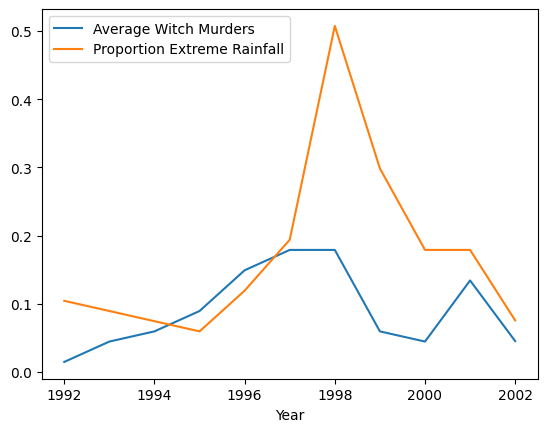

In [57]:
figure_1 = eventsDF.groupby("year")[["witch_murders", "any_rain"]].mean()
ax = figure_1.plot.line()
ax.legend(["Average Witch Murders", "Proportion Extreme Rainfall"])
ax.set_xlabel("Year")